## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
import statsmodels.stats.diagnostic as diag
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

random_state = 42

## Data Upload

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis

### Variable Categorization

#### **Numerical**

`Continuous`: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

`Discrete`: Id, MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold, YrSold

#### **Categorical**
`Nominal`: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, MiscFeature, SaleType, SaleCondition

`Ordinal`: ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

### Descriptive Statistics

#### General Information of DF

In [3]:
df.shape

(1460, 81)

In [4]:
df_describe = df.loc[:, df.columns != 'Id']
df_describe.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Variable Distribution Type

In [6]:
df_numerical = df_describe.select_dtypes(include=[np.number])
df_numerical

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
df_numerical_cp = df_numerical
for column in df_numerical_cp:
    colData = df_numerical_cp[column].dropna()
    stat, p_value = diag.lilliefors(colData.values)
    if p_value <= 0.05:
        print(f'{column}: Does not follow a normal distribution.')
    else:
        print(f'{column}: Follows a normal distribution.')

MSSubClass: Does not follow a normal distribution.
LotFrontage: Does not follow a normal distribution.
LotArea: Does not follow a normal distribution.
OverallQual: Does not follow a normal distribution.
OverallCond: Does not follow a normal distribution.
YearBuilt: Does not follow a normal distribution.
YearRemodAdd: Does not follow a normal distribution.
MasVnrArea: Does not follow a normal distribution.
BsmtFinSF1: Does not follow a normal distribution.
BsmtFinSF2: Does not follow a normal distribution.
BsmtUnfSF: Does not follow a normal distribution.
TotalBsmtSF: Does not follow a normal distribution.
1stFlrSF: Does not follow a normal distribution.
2ndFlrSF: Does not follow a normal distribution.
LowQualFinSF: Does not follow a normal distribution.
GrLivArea: Does not follow a normal distribution.
BsmtFullBath: Does not follow a normal distribution.
BsmtHalfBath: Does not follow a normal distribution.
FullBath: Does not follow a normal distribution.
HalfBath: Does not follow a nor

#### Frequency Tables

In [8]:
for column in df.columns:
    if df[column].dtype != 'O' and column != 'MSSubClass':
        continue

    freqTable = df[column].value_counts().reset_index()

    freqTable.columns = [column, 'Frequency']

    # Table formatting
    freqTable[column] = freqTable[column].astype(str).str.center(20)
    freqTable['Frequency'] = freqTable['Frequency'].astype(str).str.center(20)
    freqTable.columns = [col.center(20) for col in freqTable.columns]

    print(f"Frequency Table for {column}:\n{freqTable}\n")

Frequency Table for MSSubClass:
         MSSubClass            Frequency      
0            20                   536         
1            60                   299         
2            50                   144         
3           120                    87         
4            30                    69         
5           160                    63         
6            70                    60         
7            80                    58         
8            90                    52         
9           190                    30         
10           85                    20         
11           75                    16         
12           45                    12         
13          180                    10         
14           40                    4          

Frequency Table for MSZoning:
         MSZoning             Frequency      
0           RL                   1151        
1           RM                   218         
2           FV                    65         
3

#### NaN Value Analysis

In [9]:
nullValues = df.isnull().sum()
nullValues = nullValues[nullValues > 0]
print("Columns with NaN values:")
print(nullValues)

Columns with NaN values:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### Correlation and Relationships

In [10]:
#label_encoder = preprocessing.LabelEncoder()
salePriceData = df['SalePrice']
df_numerical_cp = df.loc[:, df.columns != 'Id']
df_numerical_cp = df_numerical_cp.select_dtypes(include=[np.number])

for col in df_numerical_cp.columns:
    colData = df_numerical_cp[col]
    corr, p_value = spearmanr(salePriceData, colData)
    if corr >= 0.50:
        print(f"Column '{col}' spearman correlation coefficient:", corr)

Column 'OverallQual' spearman correlation coefficient: 0.8098285862017292
Column 'YearBuilt' spearman correlation coefficient: 0.6526815462850586
Column 'YearRemodAdd' spearman correlation coefficient: 0.5711589780582342
Column 'TotalBsmtSF' spearman correlation coefficient: 0.6027254448924096
Column '1stFlrSF' spearman correlation coefficient: 0.5754078354212824
Column 'GrLivArea' spearman correlation coefficient: 0.7313095834659141
Column 'FullBath' spearman correlation coefficient: 0.6359570562496957
Column 'TotRmsAbvGrd' spearman correlation coefficient: 0.5325859351169929
Column 'Fireplaces' spearman correlation coefficient: 0.5192474498367013
Column 'GarageCars' spearman correlation coefficient: 0.6907109670497434
Column 'GarageArea' spearman correlation coefficient: 0.6493785338868229
Column 'SalePrice' spearman correlation coefficient: 1.0


### Data visualization

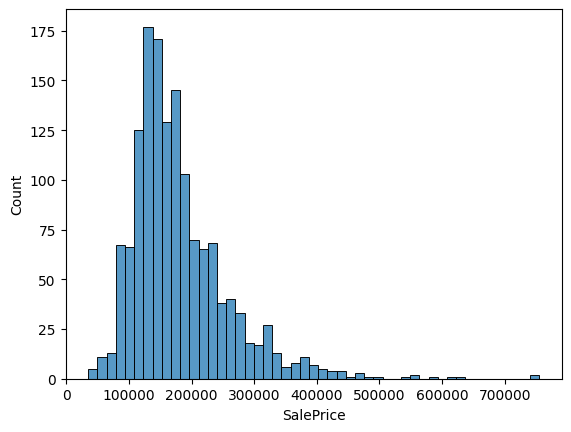

In [11]:
sns.histplot(x='SalePrice', data=df, )
plt.show()

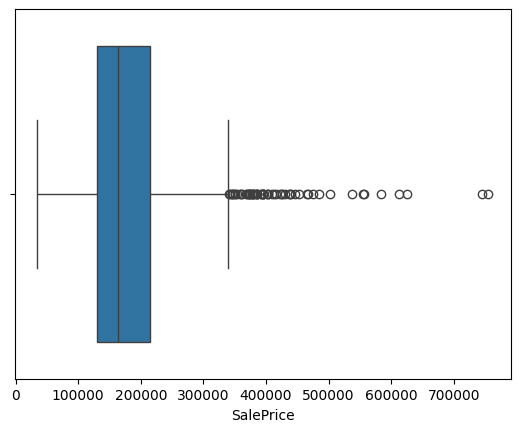

In [12]:
sns.boxplot(x='SalePrice', data=df, )
plt.show()

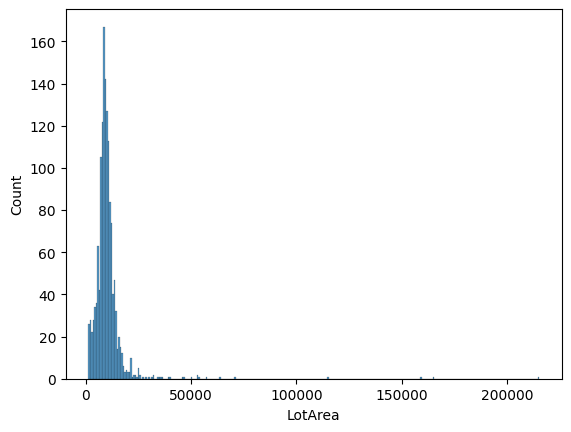

In [13]:
sns.histplot(x='LotArea', data=df, )
plt.show()

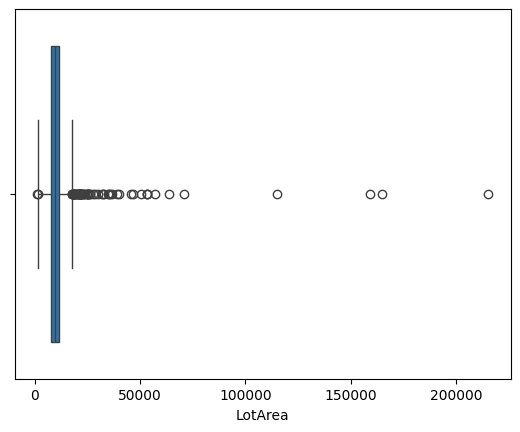

In [14]:
sns.boxplot(x='LotArea', data=df, )
plt.show()

## Data Preprocessing

### Handling Missing Values

In [15]:
# Remove rows with missing values in 'MasVnrType', 'MasVnrArea', and 'Electrical' columns.
df.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)

In [16]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [17]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'].fillna('None', inplace=True)

In [18]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)

In [19]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)

In [20]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

### Encoding

In [21]:
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']


In [22]:
df = pd.get_dummies(df, columns = nominalFeatures)

In [23]:
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [24]:
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

ordinalEncoder = OrdinalEncoder(categories=encodingCategories)
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [25]:
df_cp = df.copy()
y = df_cp.pop('SalePrice')
X = df_cp

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(1044, 224)
(291, 224)
(116, 224)


291 registros de test, 1043 de train y de esos 116 para validar. Se decidio hacer esta particion asi po

### Feature Engineering

In [28]:
X_train_cp = X_train.copy()

#### Feature Creation

In [29]:
X_train_cp['HouseAge'] = X_train_cp['YrSold'] - X_train_cp['YearBuilt']
X_train_cp['TotalFullBathrooms'] = X_train_cp['FullBath'] + X_train_cp['BsmtFullBath']
X_train_cp['TotalHalfBathrooms'] = X_train_cp['BsmtHalfBath'] + X_train_cp['HalfBath']

In [30]:
X_train_cp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y,HouseAge,TotalFullBathrooms,TotalHalfBathrooms
1064,1065,20,73.0,11000,5,6,1966,1966,200.0,3.0,...,0,0,1,0,0,0,1,43,1,1
895,896,60,71.0,7056,6,5,1963,1963,415.0,3.0,...,0,0,1,0,0,0,1,45,2,1
555,556,45,58.0,6380,5,6,1922,1950,0.0,3.0,...,0,0,1,0,0,0,1,84,1,0
552,553,20,87.0,11146,8,5,2006,2006,250.0,4.0,...,0,0,1,0,0,0,1,3,2,0
1022,1023,50,52.0,9439,5,5,1930,1950,0.0,3.0,...,0,0,1,0,0,0,1,77,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,1063,190,85.0,13600,5,5,1900,1950,0.0,3.0,...,0,0,1,0,0,0,1,107,2,0
205,206,20,99.0,11851,7,5,1990,1990,0.0,3.0,...,0,0,1,0,0,0,1,19,2,0
859,860,60,80.0,11029,6,7,1968,1984,220.0,3.0,...,0,0,1,0,0,0,1,38,3,1
1257,1258,30,56.0,4060,5,8,1922,1950,0.0,3.0,...,0,0,1,0,0,0,1,87,1,0


#### Feature Selection

In [31]:
columnNames = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
               'HouseAge', 'TotalFullBathrooms', 'TotalHalfBathrooms']
X_train_cp = selected_columns = X_train_cp.loc[:, columnNames]
X_train_cp

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,HouseAge,TotalFullBathrooms,TotalHalfBathrooms
1064,5,1966,1966,1154,1154,1154,1,6,1,2,480,43,1,1
895,6,1963,1963,780,983,1796,1,8,1,2,483,45,2,1
555,5,1922,1950,993,1048,1048,1,5,1,1,280,84,1,0
552,8,2006,2006,1709,1717,1717,2,7,1,3,908,3,2,0
1022,5,1930,1950,912,912,1248,1,6,0,1,160,77,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,5,1900,1950,662,1422,2337,2,10,0,2,560,107,2,0
205,7,1990,1990,1424,1442,1442,2,5,0,2,500,19,2,0
859,6,1968,1984,1054,1512,2654,2,9,1,2,619,38,3,1
1257,5,1922,1950,864,864,864,1,4,0,0,0,87,1,0


## Linear Regressions

### First Iteration

In [32]:
salePrice = y_train.values.reshape(-1,1)
salePrice_v = y_valid.values.reshape(-1,1)
overallQual = X_train_cp['OverallQual'].values.reshape(-1,1)
overallQual_v = X_valid['OverallQual'].values.reshape(-1,1)

lm = LinearRegression()
lm.fit(overallQual, salePrice)
salePrice_pred = lm.predict(overallQual_v)

In [33]:
m = lm.coef_[0][0]
c = lm.intercept_[0]
label = r'$salePrice = %0.4f*overallQual %+0.4f$'%(m,c)
print(label)

$salePrice = 44913.0081*overallQual -92991.0166$


Text(0.5, 1.0, 'Validation Set - Sale Price vs Overall Quality')

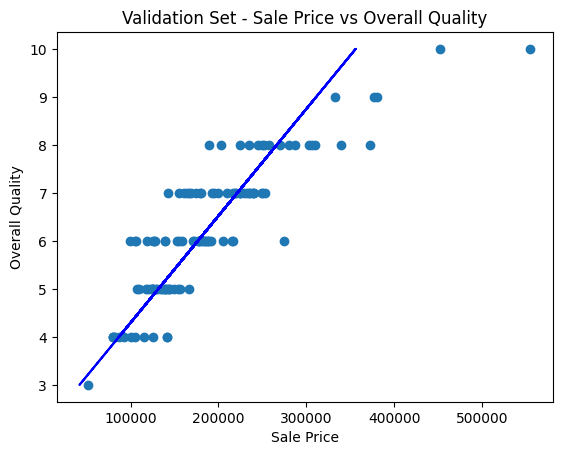

In [34]:
fig = plt.figure()
plt.scatter(salePrice_v,overallQual_v)
plt.plot(salePrice_pred, overallQual_v, color="blue")
plt.xlabel("Sale Price")
plt.ylabel("Overall Quality")
plt.title("Validation Set - Sale Price vs Overall Quality")

In [35]:
print("Mean Squared Error: %.2f"%mean_squared_error(salePrice_v,salePrice_pred))
print("R squared: %.2f"%r2_score(salePrice_v,salePrice_pred))

Mean Squared Error: 1630450142.75
R squared: 0.74


##### Residual Analysis

In [36]:
residuals = salePrice_v - salePrice_pred
len(residuals)

116

Text(0, 0.5, 'Residuales')

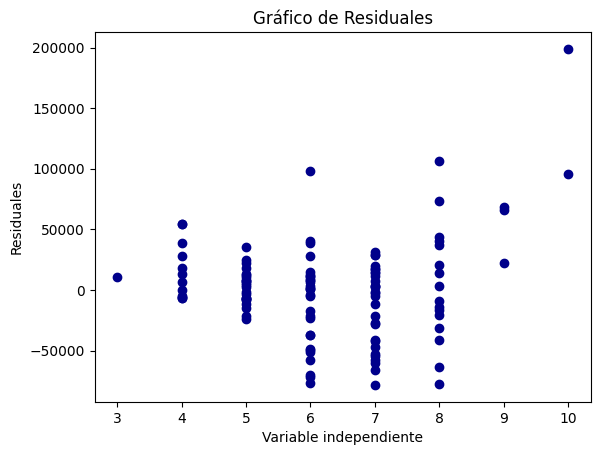

In [37]:
plt.plot(overallQual_v, residuals, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

Text(0.5, 1.0, 'Residuales')

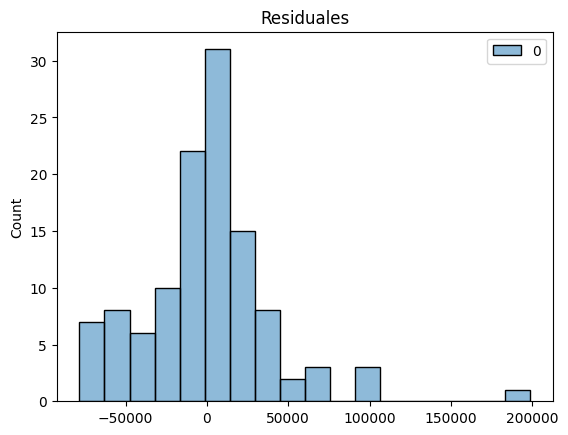

In [39]:
sns.histplot(residuals);
plt.title("Residuales")